In [1]:
#import pmdarima as pm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf



In [3]:
!pip install liac-arff

In [4]:
import arff

In [5]:
with open("C:\\Users\\GASTO\\Downloads\\dataset.arff", "r") as file:
    maldata = arff.load(file)

df = pd.DataFrame(maldata["data"], columns=[attr[0] for attr in maldata["attributes"]])

In [6]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [7]:
df.shape

(420768, 18)

In [8]:
df.index.dtype

dtype('int64')

In [9]:
df["date"] = pd.to_datetime(df[["year", "month", "day"]])

In [10]:
df = df.drop(columns=["day", "month", "year"])

In [11]:
df.head()

,No,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
0,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01
1,2,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01
2,3,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01
3,4,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01
4,5,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01


In [12]:
df = df.set_index("date")

In [13]:
df.head()

,No,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
date,,,,,,,,,,,,,,,
2013-03-01,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
2013-03-01,2,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2013-03-01,3,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
2013-03-01,4,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
2013-03-01,5,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [14]:
df.drop(columns="No",inplace=True)

In [15]:
df.head()

,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
date,,,,,,,,,,,,,,
2013-03-01,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
2013-03-01,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2013-03-01,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
2013-03-01,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
2013-03-01,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [16]:
df.tail()

,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
date,,,,,,,,,,,,,,
2017-02-28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
2017-02-28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
2017-02-28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
2017-02-28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong
2017-02-28,23,13.0,19.0,4.0,38.0,600.0,49.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Wanshouxigong


In [18]:
df.dtypes

hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object

In [20]:
numeric_col = df.select_dtypes(include=["int64", "float64"])

# building the correlation between variables

In [22]:
correlation_matrix=numeric_col.corr()
correlation_matrix

,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
hour,1.000000,0.011709,0.051426,0.029947,-0.001559,-0.031358,0.282287,0.141983,-0.038367,-0.012216,0.012381,0.140486
PM2.5,0.011709,1.000000,0.884380,0.482354,0.666948,0.789998,-0.149697,-0.131127,0.018566,0.114656,-0.014359,-0.272205
PM10,0.051426,0.884380,1.000000,0.462651,0.652193,0.702363,-0.111294,-0.096209,-0.017971,0.070310,-0.026519,-0.183665
SO2,0.029947,0.482354,0.462651,1.000000,0.499496,0.535750,-0.165341,-0.321799,0.223236,-0.266781,-0.040241,-0.108717
NO2,-0.001559,0.666948,0.652193,0.499496,1.000000,0.705500,-0.471587,-0.278192,0.174167,-0.031599,-0.043785,-0.400460
CO,-0.031358,0.789998,0.702363,0.535750,0.705500,1.000000,-0.313012,-0.326237,0.188195,-0.057129,-0.013342,-0.297511
O3,0.282287,-0.149697,-0.111294,-0.165341,-0.471587,-0.313012,1.000000,0.594910,-0.445961,0.312074,0.023320,0.295743
TEMP,0.141983,-0.131127,-0.096209,-0.321799,-0.278192,-0.326237,0.594910,1.000000,-0.813309,0.820118,0.037635,0.033036
PRES,-0.038367,0.018566,-0.017971,0.223236,0.174167,0.188195,-0.445961,-0.813309,1.000000,-0.750222,-0.060948,0.065099
DEWP,-0.012216,0.114656,0.070310,-0.266781,-0.031599,-0.057129,0.312074,0.820118,-0.750222,1.000000,0.086292,-0.296591


# checking for missingness

In [23]:
total_len=len(df)

In [24]:
missingness = df.isnull().sum()
missingness

hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

# percentage of missingness

In [25]:
percentage_missingness=(missingness/total_len)*100
percentage_missingness

hour       0.000000
PM2.5      2.076916
PM10       1.532674
SO2        2.143937
NO2        2.879497
CO         4.919813
O3         3.155421
TEMP       0.094589
PRES       0.093401
DEWP       0.095777
RAIN       0.092688
wd         0.433018
WSPM       0.075576
station    0.000000
dtype: float64

# visualization of data

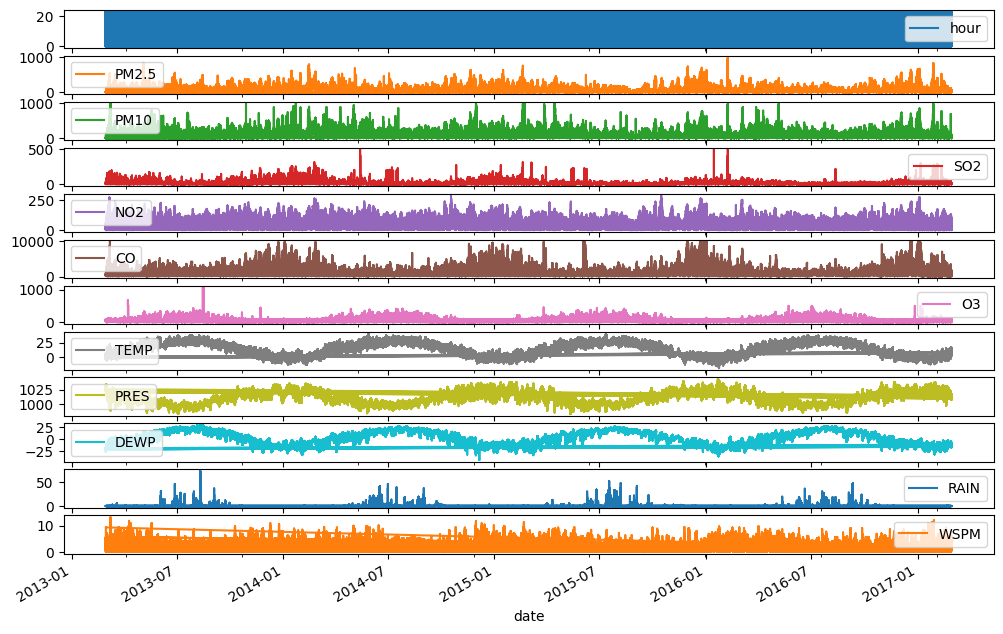

In [ ]:
df.plot(figsize=(12, 8), subplots=True)
plt.show()

# PM2.5 Visualization(particulate matter with diameter less than 2.5)
- 

In [26]:
pm25_corr= correlation_matrix["PM2.5"].sort_values(ascending=False)
pm25_corr

PM2.5    1.000000
PM10     0.884380
CO       0.789998
NO2      0.666948
SO2      0.482354
DEWP     0.114656
PRES     0.018566
hour     0.011709
RAIN    -0.014359
TEMP    -0.131127
O3      -0.149697
WSPM    -0.272205
Name: PM2.5, dtype: float64

- from this we can say that PM 10  has the highest correlation towards influncing PM2.5 occurence.

- CO,NO2,SO2... indicate moderate correlation indicating that these gases are also often associated with condition to produce PM 2.5.

- DEWP,PRES..indicate a weak positive correlation therefore indirectly affect air pollution.

- RAIN,TEMP,O3,WSPM.. have a negative correlation indicating that they might help reduce the level of PM2.5 in the atmosphere.

# EDA

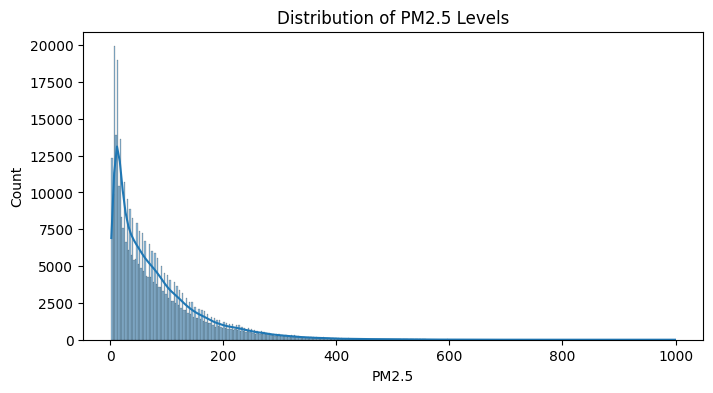

In [29]:
plt.figure(figsize=(8, 4))
sns.histplot(df["PM2.5"], kde=True)
plt.title("Distribution of PM2.5 Levels")
plt.xlabel("PM2.5")
plt.show()

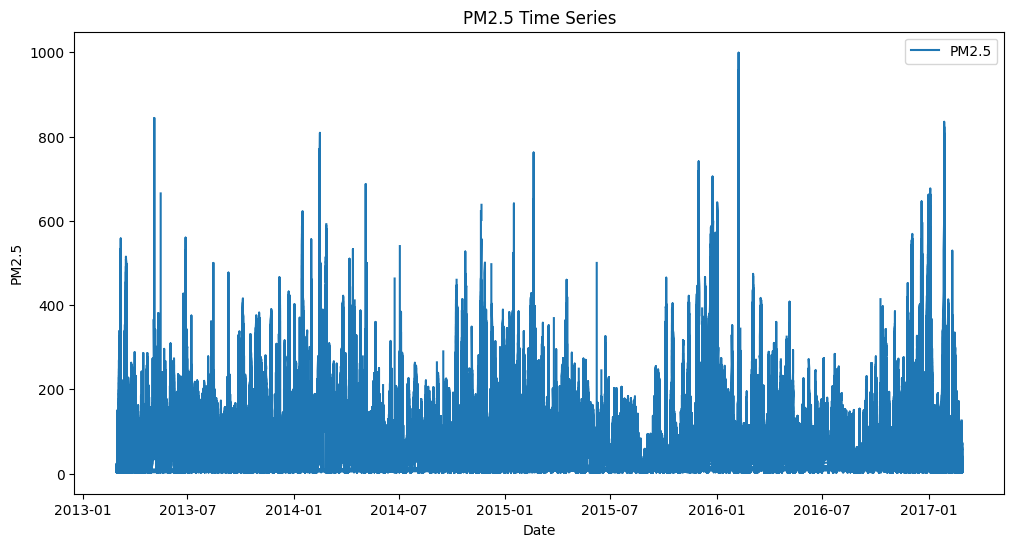

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df["PM2.5"], label="PM2.5 levels")
plt.title("PM2.5 Time Series")
plt.xlabel("Date")
plt.ylabel("PM2.5")
plt.legend()
plt.show()

# Hourly Data Visualization

In [31]:
hourly_data = df.groupby(df.index.hour)["PM2.5"].mean()
hourly_data

date
0    79.793428
Name: PM2.5, dtype: float64

0- this is the hour of the day in 24 hours.
- the value 79.79 indicate the concentration level of PM2.5  at(12:00) across the  days in my dataset.
- 

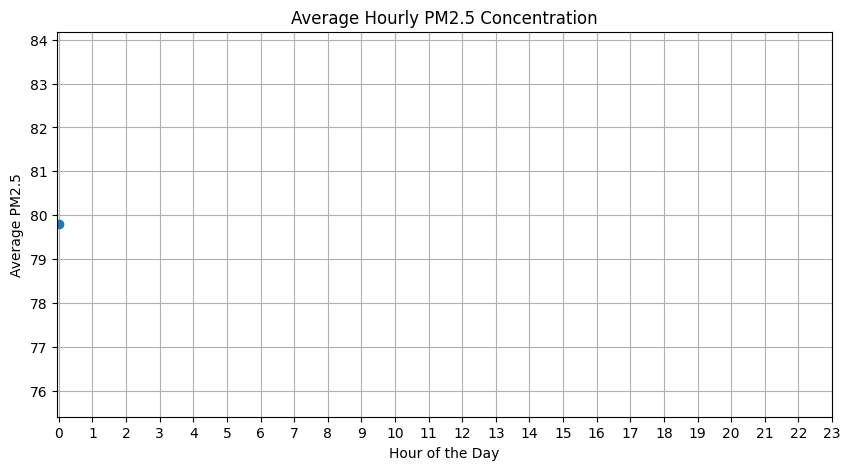

In [36]:
plt.figure(figsize=(10, 5))
plt.plot(
    hourly_data.index, hourly_data.values, marker="o")
plt.title("Average Hourly PM2.5 Concentration")
plt.xlabel("Hour of the Day")
plt.ylabel("Average PM2.5")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

# Daily Data Visualization

In [37]:
daily_data = df.groupby(df.index.day)["PM2.5"].mean()
daily_data

date
1     89.105792
2     73.893357
3     83.092365
4     88.825684
5     76.401764
6     85.975596
7     84.870076
8     81.305782
9     70.754128
10    65.100295
11    65.926977
12    62.058006
13    70.616129
14    79.658888
15    92.824323
16    93.294692
17    87.684244
18    78.117090
19    80.655425
20    78.591423
21    84.786081
22    77.305024
23    78.876485
24    78.072487
25    91.074191
26    83.415794
27    66.651802
28    83.244762
29    79.046807
30    80.249824
31    83.799592
Name: PM2.5, dtype: float64

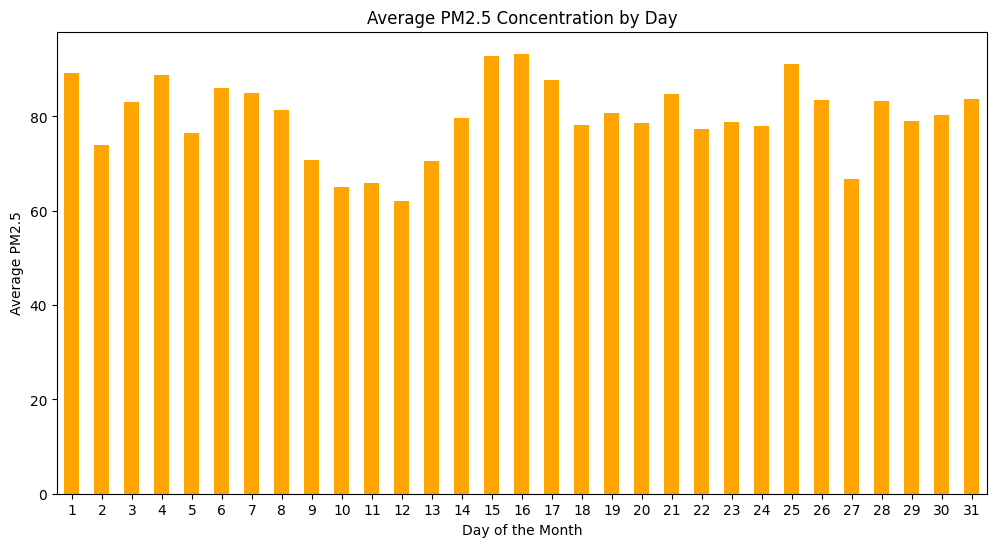

In [ ]:
plt.figure(figsize=(12, 6))
daily_data.plot(kind="bar", color="orange")
plt.title("Average PM2.5 Concentration by Day")
plt.xlabel("Day of the Month")
plt.ylabel("Average PM2.5")
plt.xticks(rotation=0)
plt.show()

#  Monthly Data Visualization

In [38]:
monthly_data = df.groupby(df.index.month)["PM2.5"].mean()
monthly_data

date
1      93.667037
2      87.572234
3      94.660678
4      72.734890
5      63.105338
6      69.091971
7      71.744853
8      53.473014
9      61.478105
10     91.726800
11     93.331519
12    104.581244
Name: PM2.5, dtype: float64

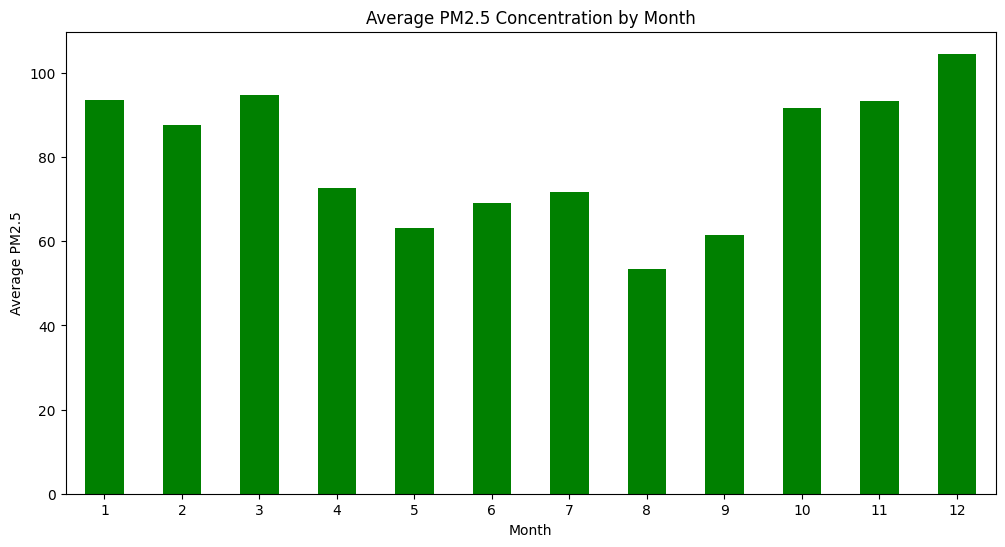

In [ ]:
plt.figure(figsize=(12, 6))
monthly_data.plot(kind="bar", color="green")
plt.title("Average PM2.5 Concentration by Month")
plt.xlabel("Month")
plt.ylabel("Average PM2.5")
plt.xticks(rotation=0)
plt.show()

the first(3)months and last(3)months had a higher concentatrion of PM2.5 .
-the 4Th -9Th month indicated a moderate levels .

# Comparing Different Time Series Features

In [39]:
hourly_data_multi = df.groupby(df.index.hour)[["PM2.5", "PM10", "NO2"]].mean()
hourly_data_multi

,PM2.5,PM10,NO2
date,,,
0,79.793428,104.602618,50.638586


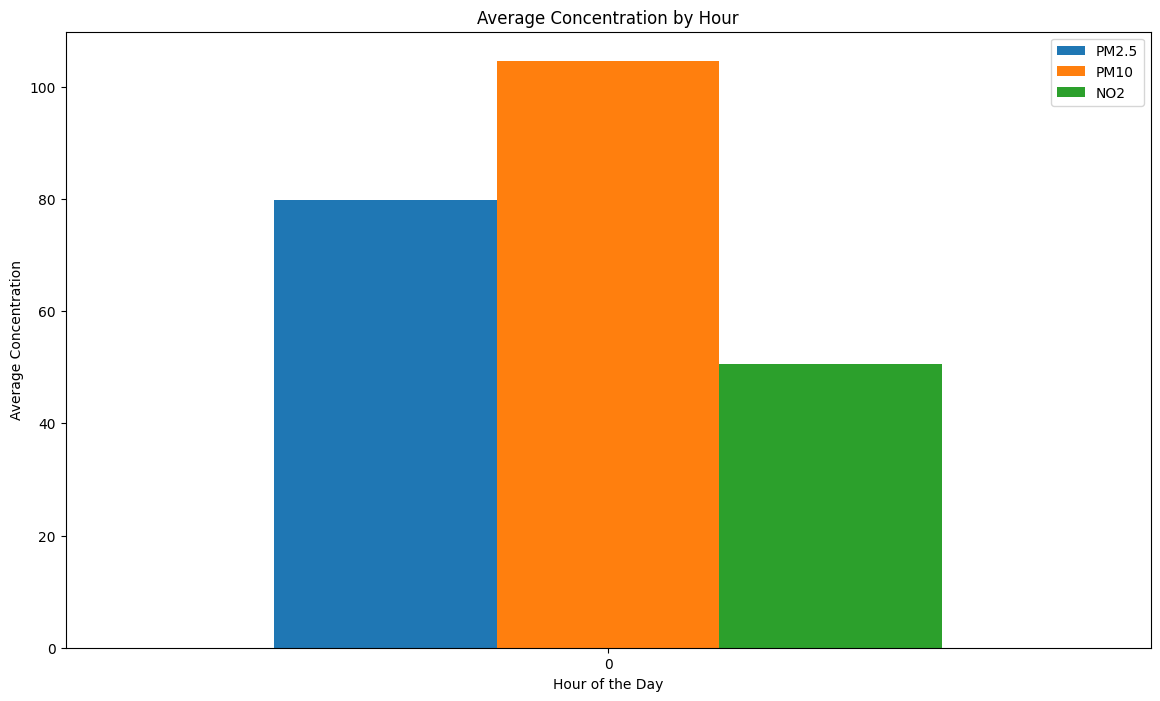

In [41]:
hourly_data_multi.plot(kind="bar", figsize=(14, 8), width=0.8)
plt.title("Average Concentration by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Concentration")
plt.xticks(rotation=0)
plt.show()

 - average concentration of PM 2.5,PM10,NO in 24 hrs indicating that PM 10 has a higher concentration than the two in 24 hours                      

# handling missingness 
- for numerical cols  (interpolation)
- for categorical variables (bfill,ffill)

In [44]:
numerical_cols = [
    "PM2.5",
    "PM10",
    "SO2",
    "NO2",
    "CO",
    "O3",
    "TEMP",
    "PRES",
    "DEWP",
    "RAIN",
    "WSPM",
]

In [45]:
df[numerical_cols] = df[numerical_cols].interpolate(method="linear")

In [46]:
df.isnull().sum()

hour          0
PM2.5         0
PM10          0
SO2           0
NO2           0
CO            0
O3            0
TEMP          0
PRES          0
DEWP          0
RAIN          0
wd         1822
WSPM          0
station       0
dtype: int64

In [47]:
categorical_cols = ["wd"]

In [48]:
df[categorical_cols] = (
    df[categorical_cols].fillna(method="ffill").fillna(method="bfill")
)

C:\Users\GASTO\AppData\Local\Temp\ipykernel_14896\1512108824.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[categorical_cols].fillna(method="ffill").fillna(method="bfill")


In [ ]:
df.isnull().sum()

hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

# Decomposition

- addictive

- multiplicative

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [50]:
df.columns = df.columns.str.strip()

In [51]:
ts=df["PM2.5"]

In [52]:
ts

date
2013-03-01     4.0
2013-03-01     8.0
2013-03-01     7.0
2013-03-01     6.0
2013-03-01     3.0
              ... 
2017-02-28    11.0
2017-02-28    13.0
2017-02-28    14.0
2017-02-28    12.0
2017-02-28    13.0
Name: PM2.5, Length: 420768, dtype: float64

In [53]:
decomposition = seasonal_decompose(ts, model="additive", period=24)

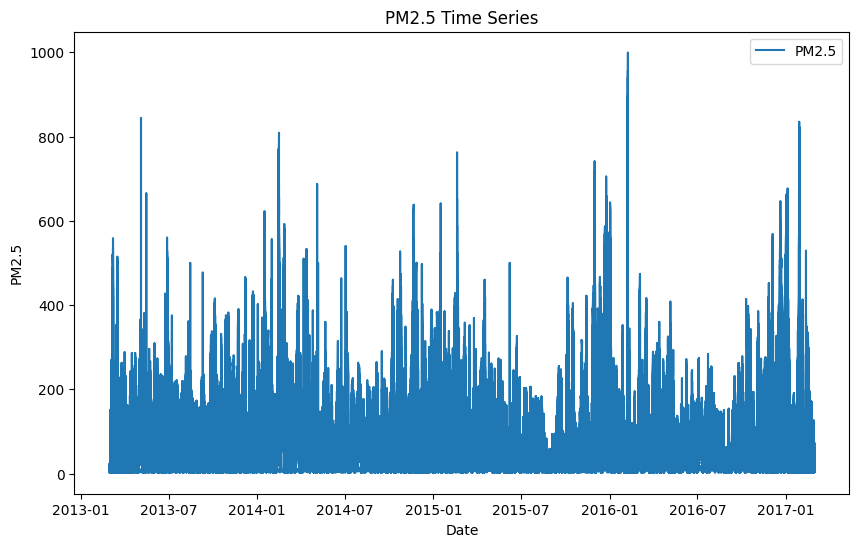

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(ts, label="PM2.5")
plt.title("PM2.5 Time Series")
plt.xlabel("Date")
plt.ylabel("PM2.5")
plt.legend()
plt.show()

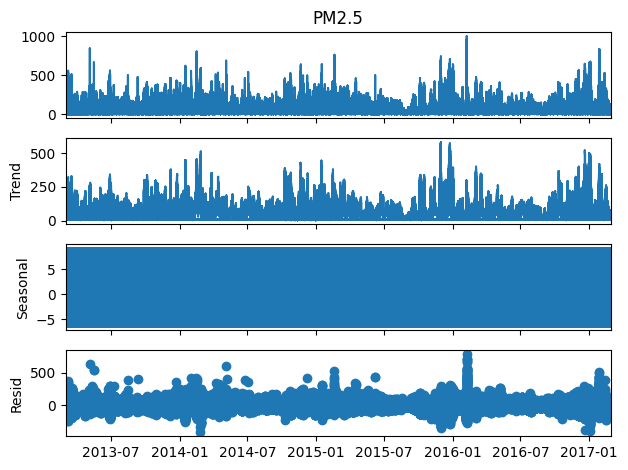

In [55]:
decomposition = seasonal_decompose(ts.dropna(), model="addictive", period=24)


decomposition.plot()
plt.show()

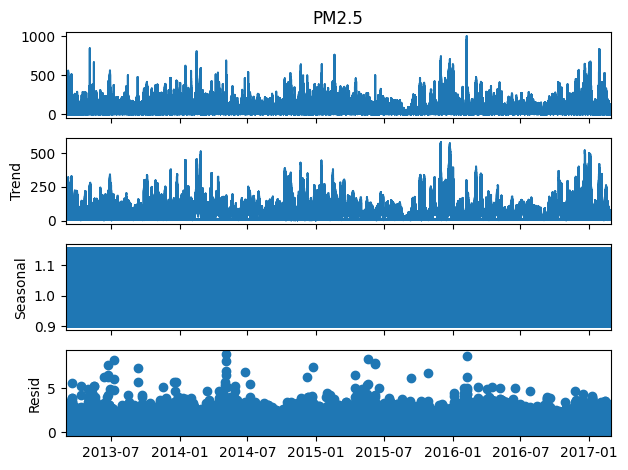

In [56]:
decomposition = seasonal_decompose(ts.dropna(), model="multiplicative", period=24)


decomposition.plot()
plt.show()

In [57]:
tr=np.log(ts)
tr

date
2013-03-01    1.386294
2013-03-01    2.079442
2013-03-01    1.945910
2013-03-01    1.791759
2013-03-01    1.098612
                ...   
2017-02-28    2.397895
2017-02-28    2.564949
2017-02-28    2.639057
2017-02-28    2.484907
2017-02-28    2.564949
Name: PM2.5, Length: 420768, dtype: float64

# STATIONALITY
- (H₀)... unit root
- 

In [ ]:
len(tr)

420768

In [ ]:
size=int(len(tr)*0.8)
size

336614

In [ ]:
df_train=tr.iloc[:size]
df_test=tr.iloc[size:]

# Checking for stationarity

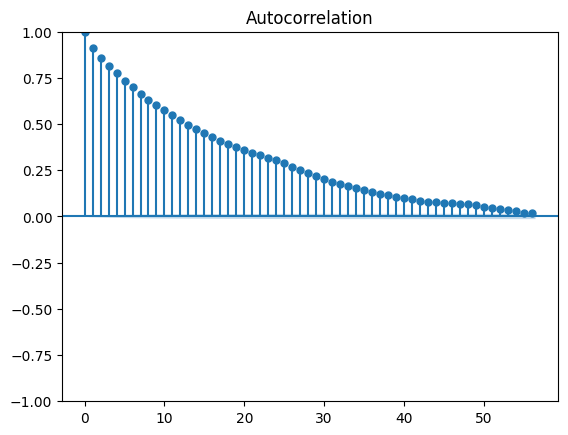

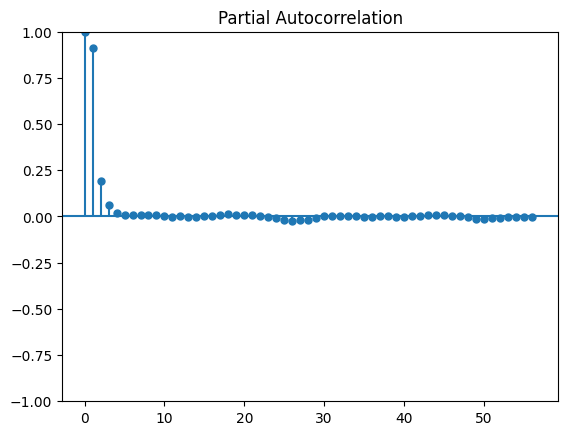

In [ ]:
acf_orignal=plot_acf(df_train)
pacf_orignal=plot_pacf(df_train)

# STATICAL TEST FOR STATIONARITY

In [ ]:
results=adfuller(df_train)
print('Adf statistics:',results[0])
print('p_value:',results[1])
print('Critical values:',results[4])


Adf statistics: -51.11142170222476
p_value: 0.0
Critical values: {'1%': np.float64(-3.430369432219331), '5%': np.float64(-2.861548588803023), '10%': np.float64(-2.5667745715077133)}


- our data is stationary since adf<critical value  and our p_ value is less than 0.05 percent hence we reject the null hypothesis

- since our data is stationary we  won't perform  differencing bt rather move on to ARIMA to determine the value of p.q

In [ ]:
model=ARIMA(df_train,order=(1,0,0))
model_fit=model.fit()
print(model_fit.summary())

c:\Users\GASTO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\GASTO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\GASTO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\GASTO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not mo

                               SARIMAX Results                                
Dep. Variable:                  PM2.5   No. Observations:               336614
Model:                 ARIMA(1, 0, 0)   Log Likelihood              164399.786
Date:                Sat, 24 Aug 2024   AIC                        -328793.572
Time:                        17:36:39   BIC                        -328761.392
Sample:                             0   HQIC                       -328784.310
                             - 336614                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2881      0.006    231.500      0.000       1.277       1.299
ar.L1          0.9091      0.001   1210.677      0.000       0.908       0.911
sigma2         0.0220   2.44e-05    905.278      0.0

from this arima results it shows that arima of (1,0,0) indicates its our best model as our p_value is less than 0.05 hence the best performance of model.

In [ ]:
model = ARIMA(df_train, order=(4, 0, 8))
model_fit = model.fit()
print(model_fit.summary())

c:\Users\GASTO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\GASTO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\GASTO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\GASTO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not mo

                               SARIMAX Results                                
Dep. Variable:                  PM2.5   No. Observations:               336614
Model:                 ARIMA(4, 0, 8)   Log Likelihood              171324.576
Date:                Sat, 24 Aug 2024   AIC                        -342621.151
Time:                        18:01:13   BIC                        -342470.978
Sample:                             0   HQIC                       -342577.928
                             - 336614                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2881      0.007    180.301      0.000       1.274       1.302
ar.L1          0.8464      0.589      1.438      0.150      -0.307       2.000
ar.L2          0.3073      0.645      0.476      0.6

In [ ]:
start=len(df_train)
end=len(df_train)+len(df_test)-1
predictions=model_fit.predict(start=start,end=end,typ='levels')

c:\Users\GASTO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\GASTO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\GASTO\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [ ]:
predictions.plot(legend=True)
df_test["PM2.5 "].plot(legend=True)
plt.show()

In [ ]:
mse=mean_squared_error(df_test,predictions)
mae=mean_absolute_error(df_test,predictions)
print(f'mean squared error:{mse}')
print(f'mean absolute error:{mae}')

mean squared error:0.12523112442838708
mean absolute error:0.2773786659307634
